In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Initialization***

In [106]:
# Importing some library files...
import sklearn
import pandas as pd
import numpy as np
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pandas.core.dtypes.common import is_numeric_dtype
import pickle
from google.colab import files
import warnings as wr
wr.filterwarnings('ignore')

# Importing ALL THE MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

# Importing evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [107]:
# Fetching the Dataset for training...
path = "/content/drive/MyDrive/Colab Notebooks/linkdin_Job_data7000.csv"
df = pd.read_csv(path)
print(len(df))
df.head()

7927


,job_type,work_type,job_details
0,"Data Analyst, Trilogy (Remote) - $60,000/year USD",Remote,About the job Crossover is the world's #1 sour...
1,"Data Analyst, Trilogy (Remote) - $60,000/year USD",Remote,About the job Crossover is the world's #1 sour...
2,Data Analyst - WFH,Remote,About the job Profile: ML EngineersExperience:...
3,Data Analyst,On-site,About the job Designation: Data AnalystLocatio...
4,Data Analyst,On-site,About the job The ideal candidate will use the...


In [108]:
target = 'job_type'

# ***Dataset Preprocessing***

In [109]:
## Dataset Cleaning ##

print(len(df[target].unique()))
df = df.dropna() # Dropping Nulls
print(len(df[target].unique()))
def clean_class_name(class_name):
    class_name = class_name.split(',')[0]
    class_name = class_name.split(' -')[0]
    class_name = class_name.split('|')[0]
    class_name = class_name.split('(')[0]
    class_name = class_name.split('[')[0]
    return class_name.strip()  # Strip to remove leading/trailing spaces

df[target] = df[target].apply(clean_class_name)
print(len(df[target].unique()))

2992
2924
2556


In [110]:
## Choosing how many classes has enough samples to keep ##

col1 = 'Class_Name'
col2 = 'Class_Count'
col3 = 'Cumulative_Count'
col4 = 'Class_Count_To_Cumulative_Count_Ratio(%)'

class_sample_report = {
    col1 : [],
    col2 : [],
    col3 : [],
    col4 : []
}

# Count occurrences of each class in the 'Class' column
class_counts = df[target].value_counts()
sorted_classes = class_counts.sort_values(ascending=False)

# #
cumulative_count = 0
for class_label, count in sorted_classes.items():
    class_sample_report[col1].append(class_label)
    class_sample_report[col2].append(count)
    cumulative_count += count
    class_sample_report[col3].append(cumulative_count)
    class_sample_report[col4].append(f"{(count/cumulative_count)*100:.2f}%")

class_sample_report = pd.DataFrame(class_sample_report)

In [111]:
class_sample_report.head(60)

,Class_Name,Class_Count,Cumulative_Count,Class_Count_To_Cumulative_Count_Ratio(%)
0,Data Engineer,199,199,100.00%
1,Business Analyst,184,383,48.04%
2,Lead Java Software Engineer,171,554,30.87%
3,Senior Automation Tester,146,700,20.86%
4,Lead Java Developer,120,820,14.63%
5,Data Analyst,119,939,12.67%
6,Lead Automation Tester,116,1055,11.00%
7,Python Developer,113,1168,9.67%
8,Senior Java Software Engineer,101,1269,7.96%
9,Lead .NET Developer,68,1337,5.09%


In [112]:
## Dropping Classes With Too Low Counts ##

# Get the classes with low number of members
classes_to_drop = class_counts[class_counts <= 41].index

# Filter the DataFrame based on classes to drop
df = df[~df[target].isin(classes_to_drop)]
print(len(df))

2041


In [113]:
# Checking sample count for each class
class_counts = df[target].value_counts()
sorted_classes = class_counts.sort_values(ascending=False)

# Print unique classes and their counts in descending order
print("Unique classes in descending order of count:")
for class_label, count in sorted_classes.items():
    print(f"Class: {class_label}, Count: {count}")

Unique classes in descending order of count:
Class: Data Engineer, Count: 199
Class: Business Analyst, Count: 184
Class: Lead Java Software Engineer, Count: 171
Class: Senior Automation Tester, Count: 146
Class: Lead Java Developer, Count: 120
Class: Data Analyst, Count: 119
Class: Lead Automation Tester, Count: 116
Class: Python Developer, Count: 113
Class: Senior Java Software Engineer, Count: 101
Class: Lead .NET Developer, Count: 68
Class: Senior Test Automation Engineer, Count: 64
Class: Senior Data Engineer, Count: 63
Class: Salesforce Developer, Count: 60
Class: Senior ReactJS Developer, Count: 58
Class: Data Scientist, Count: 57
Class: Senior Business Analyst, Count: 56
Class: Azure Data Engineer, Count: 56
Class: Java Team Lead, Count: 55
Class: PL/SQL Developer, Count: 53
Class: Lead Test Automation Engineer, Count: 50
Class: Human Resources Intern, Count: 45
Class: Senior Analyst, Count: 45
Class: Senior Developer, Count: 42


In [114]:
skills = [
    "python", "sql", "aws", "data analysis", "communication", "financial analysis", "recruiting",
    "training", "performance management", "advertising", "tableau", "marketing", "excel",
    "sales", "digital marketing", "css", "project management", "html", "writing",
    "content creation", "sem", "social media", "javascript", "erp", "critical thinking",
    "analytics", "crm", "research", "seo", "design", "artificial intelligence",
    "machine learning", "compliance", "accounting", "forecasting", "leadership",
    "audit", "risk management", "legal", "budgeting", "databases", "teamwork", "java",
    "linux", "windows", "network security", "agile", "scrum", "spring", "hibernate",
    "supply chain", "logistics", "operations management", "negotiation", "cisco",
    "quality assurance", "human resources", "business development", "c++", "git",
    "data science", "big data", "deep learning", "hadoop", "spark", "etl",
    "data warehousing", "mysql", "sql server", "docker", "kubernetes", "ci/cd",
    "jenkins", "electrical engineering", "autocad", "matlab", "power systems", "circuit design",
    "organizational skills", "administrative skills", "microsoft office", "react", "angular",
    "web development", "ux/ui design", "safety", "compliance", "auditing", "environmental health",
    "process improvement", "lean manufacturing", "six sigma", "interior design", "3d modeling",
    "photoshop", "financial analysis", "investment strategies", "economics", "troubleshooting",
    "itil", "hardware support", "laboratory skills", "quality control", "chemistry", "biology",
    "instrumentation", "legal research", "transportation management", "planning", "pharmaceutical industry",
    "medical knowledge", "patient care", "healthcare", "time management", "organization",
    "legal documentation", "prototyping", "product development", "creativity", "technical documentation",
    "graphic design", "user research", "fabrication", "metalworking", "blueprint reading",
    "mig/tig welding", "yoga teaching", "fitness", "health and wellness", "flexibility training"
]

skills = list(set(skills))

for skill in skills:
    tmplist = []
    for detail in df["job_details"]:
      tmptext = detail.lower().translate(str.maketrans('', '', string.punctuation)).split(' ')
      flag=0;
      for word in tmptext:
        if word == skill:
          flag=1
          break
      tmplist.append(flag)
    df[skill]=tmplist

In [115]:
df = df.drop("job_details", axis=1)
le = LabelEncoder()
df['work_type'] = le.fit_transform(df['work_type'])
df.tail()

,job_type,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
7824,PL/SQL Developer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7830,PL/SQL Developer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7896,Senior Data Engineer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7897,Python Developer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7921,Python Developer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
y = df[target]
X = df.drop(target, axis=1)
X.describe()

,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,aws,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
count,2041.000000,2041.0,2041.000000,2041.0,2041.0,2041.0,2041.0,2041.000000,2041.000000,2041.000000,...,2041.000000,2041.0,2041.0,2041.0,2041.0,2041.000000,2041.0,2041.000000,2041.0,2041.0
mean,1.476727,0.0,0.015189,0.0,0.0,0.0,0.0,0.000980,0.274375,0.346889,...,0.116120,0.0,0.0,0.0,0.0,0.085252,0.0,0.026458,0.0,0.0
std,0.723263,0.0,0.122333,0.0,0.0,0.0,0.0,0.031296,0.446308,0.476097,...,0.320447,0.0,0.0,0.0,0.0,0.279325,0.0,0.160531,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
50%,2.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
75%,2.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
max,2.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0


In [117]:
# Splitting Data into Train and Test Sets...
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

In [118]:
# print(df.isnull().sum())
print(len(skills))
# print(len(filtered_X))
# print(len(filtered_y))
print(len(y.unique()))
print(len(y_train.unique()))
print(len(y_test.unique()))

128
23
23
23


In [119]:
X_test2 = X_test[:1]
X_test2

,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,aws,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
2567,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
#lists initiated that will contain the name of the models and their respective metrics
names = []
scores = []
cross_scores = []
f1=[]
pr=[]

# ***KNN***

In [121]:
classifier = KNeighborsClassifier() # n_neighbors = 5
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
# y_pred

In [122]:
y_pred2 = classifier.predict(X_test2)
y_pred2

array(['Salesforce Developer'], dtype=object)

In [123]:
# Evaluating KNN for Classification...
acc =  classifier.score(X_test, y_test)
print(acc)

0.6653620352250489


Text(0, 0.5, 'F1 Score')

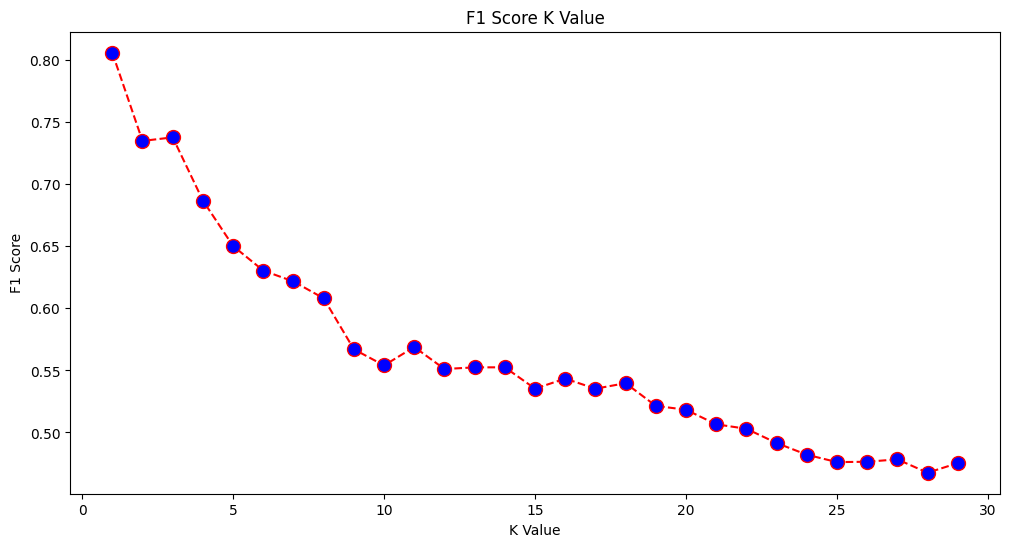

In [124]:
# ============================================
# Finding the Best K for KNN Classification...
# ============================================

f1s_KNN = []

# Calculating f1 score for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # average='weighted' to calculate a weighted average for the classes
    f1s_KNN.append(f1_score(y_test, pred_i, average='weighted'))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), f1s_KNN, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [125]:
# The f1-score is the highest when the value of the K is...
# Retrain the classifier with best k neighbors...
classifier_best = KNeighborsClassifier(n_neighbors=5)
classifier_best.fit(X_train, y_train)
y_pred_best = classifier_best.predict(X_test)
#print(classification_report(y_test, y_pred_best))

In [126]:
y_pred2_best = classifier_best.predict(X_test2)
y_pred2_best

array(['Salesforce Developer'], dtype=object)

In [127]:
# Evaluating KNN for Classification...
acc =  classifier_best.score(X_test, y_test)
print(acc)

0.6653620352250489


In [128]:
knn_acc = accuracy_score(y_test, y_pred_best)
print("KNN accuracy:", knn_acc)
knn_accuracy = cross_val_score(classifier_best,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", knn_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('KNN')
scores.append(knn_acc)
cross_scores.append(knn_accuracy.mean())
pr.append(prv)
f1.append(f1v)

KNN accuracy: 0.6653620352250489
Cross-Validation Accuracy: 0.43632210165619645
Precision: 0.6789750081396909
F1 Score: 0.6502229921316884


In [129]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

            Azure Data Engineer       0.43      0.21      0.29        14
               Business Analyst       0.45      0.70      0.55        46
                   Data Analyst       0.60      0.60      0.60        30
                  Data Engineer       0.75      0.76      0.75        50
                 Data Scientist       0.67      0.29      0.40        14
         Human Resources Intern       0.78      0.64      0.70        11
                 Java Team Lead       1.00      0.50      0.67        14
            Lead .NET Developer       0.57      0.24      0.33        17
         Lead Automation Tester       0.62      0.97      0.76        29
            Lead Java Developer       0.69      0.80      0.74        30
    Lead Java Software Engineer       0.84      0.98      0.90        43
  Lead Test Automation Engineer       0.93      1.00      0.96        13
               PL/SQL Developer       0.69      0.

In [130]:
# =============================================================
# Implementing KNN for Outlier Detection with Scikit-Learn...
# =============================================================

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors...
distances, indexes = nbrs.kneighbors(X_train)

# 5 distances for each data point (distance between itself and 5 neighbors)...
distances[:3], distances.shape

(array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.73205081],
        [0.        , 0.        , 0.        , 1.        , 1.        ]]),
 (1530, 5))

In [131]:
# Look at the neighbors' indexes for 3 rows...
indexes[:3], indexes[:3].shape

(array([[1410, 1461,  759,    0, 1407],
        [1199,  157,  887,    1,  964],
        [1264,    2,   73,  769, 1514]]),
 (3, 5))

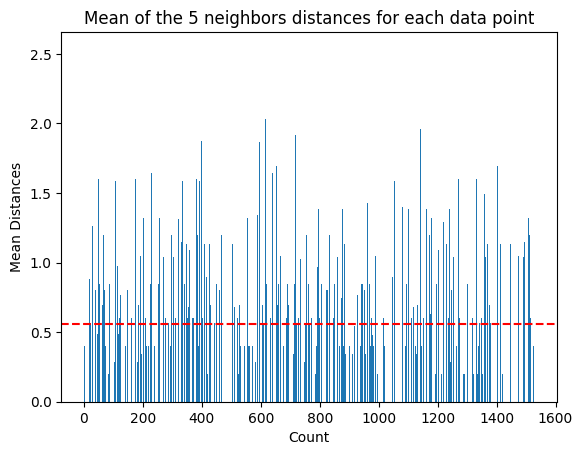

In [132]:
# calculate the mean of the 5 distances and plot a graph that counts
# each row on the X-axis and displays each mean distance on the Y-axis...
dist_means = distances.mean(axis=1)
plt.bar(np.array(range(0, len(y_train))), dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

plt.axhline(y = 0.56, color = 'r', linestyle = '--')

In [133]:
# Visually determine cutoff values > 0.56
outlier_index = np.where(dist_means > 0.56)
outlier_index

(array([   6,    7,   10,   15,   17,   19,   21,   22,   25,   27,   28,
          29,   32,   34,   38,   39,   42,   49,   50,   51,   53,   54,
          59,   62,   63,   65,   66,   67,   69,   70,   72,   74,   75,
          78,   79,   82,   86,   87,   88,   93,   96,  103,  105,  107,
         109,  111,  112,  114,  116,  118,  121,  122,  124,  125,  127,
         133,  146,  147,  148,  149,  152,  153,  154,  160,  161,  162,
         166,  167,  171,  172,  175,  176,  179,  183,  185,  188,  192,
         194,  198,  202,  204,  208,  209,  211,  221,  222,  224,  225,
         226,  227,  228,  229,  230,  231,  233,  234,  238,  244,  250,
         253,  255,  256,  258,  259,  261,  262,  264,  270,  272,  274,
         277,  278,  281,  285,  286,  287,  291,  295,  297,  298,  300,
         301,  304,  305,  306,  308,  309,  310,  311,  315,  317,  319,
         321,  322,  323,  326,  328,  330,  331,  332,  333,  334,  335,
         336,  337,  341,  345,  348, 

In [134]:
# Filter outlier values (locate them in the dataframe)...
outlier_values = df.iloc[outlier_index]
outlier_values

,job_type,work_type,legal documentation,legal,supply chain,health and wellness,autocad,user research,instrumentation,java,...,scrum,big data,yoga teaching,ux/ui design,time management,planning,chemistry,recruiting,operations management,investment strategies
6,Data Analyst,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,Data Engineer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,Salesforce Developer,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
42,Salesforce Developer,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,Salesforce Developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,Lead Automation Tester,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5473,Senior Automation Tester,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5481,Senior Automation Tester,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5485,Lead Automation Tester,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ***Decision Tree***

In [135]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# y_pred

In [136]:
y_pred2 = clf.predict(X_test2)
y_pred2

array(['Salesforce Developer'], dtype=object)

In [137]:
#tree.plot_tree(clf)

In [138]:
#plt.figure(figsize=(10,10)) # For example, (6, 10) represents a figure size of 6 inches in width and 10 inches in height.
#tree.plot_tree(clf, rounded=True, filled=True, feature_names=X.columns)

In [139]:
x_updated=X.columns.tolist() # Convert x.columns to a list of strings
text_rep=tree.export_text(clf, feature_names=x_updated) # Export the decision tree as text representation
print(text_rep)

|--- java <= 0.50
|   |--- work_type <= 1.50
|   |   |--- python <= 0.50
|   |   |   |--- communication <= 0.50
|   |   |   |   |--- sql <= 0.50
|   |   |   |   |   |--- etl <= 0.50
|   |   |   |   |   |   |--- agile <= 0.50
|   |   |   |   |   |   |   |--- accounting <= 0.50
|   |   |   |   |   |   |   |   |--- leadership <= 0.50
|   |   |   |   |   |   |   |   |   |--- spark <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- legal <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- legal >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Business Analyst
|   |   |   |   |   |   |   |   |   |--- spark >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Data Engineer
|   |   |   |   |   |   |   |   |--- leadership >  0.50
|   |   |   |   |   |   |   |   |   |--- work_type <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- organization <= 0.50
|   |   |   |   |   |   |   |   |   |   | 

In [140]:
# Evaluating DT for Classification...
acc =  clf.score(X_test, y_test)
print(acc)

0.8180039138943248


In [141]:
dt_acc = accuracy_score(y_test, y_pred)
print("DT accuracy:", dt_acc)
dt_accuracy = cross_val_score(clf,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", dt_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('DT')
scores.append(dt_acc)
cross_scores.append(dt_accuracy.mean())
pr.append(prv)
f1.append(f1v)

DT accuracy: 0.8180039138943248
Cross-Validation Accuracy: 0.5753474205216067
Precision: 0.8313196082933542
F1 Score: 0.8175402919202571


In [142]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

            Azure Data Engineer       0.60      0.43      0.50        14
               Business Analyst       0.84      0.78      0.81        46
                   Data Analyst       0.93      0.83      0.88        30
                  Data Engineer       0.82      0.74      0.78        50
                 Data Scientist       0.77      0.71      0.74        14
         Human Resources Intern       1.00      0.82      0.90        11
                 Java Team Lead       0.61      1.00      0.76        14
            Lead .NET Developer       0.87      0.76      0.81        17
         Lead Automation Tester       0.78      1.00      0.88        29
            Lead Java Developer       0.78      0.60      0.68        30
    Lead Java Software Engineer       0.96      1.00      0.98        43
  Lead Test Automation Engineer       0.87      1.00      0.93        13
               PL/SQL Developer       0.73      0.

# ***Logistic Regression***

In [143]:
lr = LogisticRegression()
lr_clf = lr.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)
print("LR accuracy:", lr_acc)
lr_accuracy = cross_val_score(lr_clf,X_test,y_test,scoring='accuracy')
print("Cross-Validation Accuracy:", lr_accuracy.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('LR')
scores.append(lr_acc)
cross_scores.append(lr_accuracy.mean())
pr.append(prv)
f1.append(f1v)

LR accuracy: 0.6614481409001957
Cross-Validation Accuracy: 0.5440129449838189
Precision: 0.6809005266991173
F1 Score: 0.6498811993197482


In [144]:
y_pred2 = lr_clf.predict(X_test2)
y_pred2

array(['Salesforce Developer'], dtype=object)

In [145]:
# Evaluating LR for Classification...
acc =  lr_clf.score(X_test, y_test)
print(acc)

0.6614481409001957


In [146]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

            Azure Data Engineer       1.00      0.21      0.35        14
               Business Analyst       0.54      0.74      0.62        46
                   Data Analyst       0.54      0.43      0.48        30
                  Data Engineer       0.60      0.68      0.64        50
                 Data Scientist       0.50      0.21      0.30        14
         Human Resources Intern       0.64      0.64      0.64        11
                 Java Team Lead       0.61      1.00      0.76        14
            Lead .NET Developer       0.70      0.41      0.52        17
         Lead Automation Tester       0.69      0.69      0.69        29
            Lead Java Developer       0.77      0.57      0.65        30
    Lead Java Software Engineer       0.91      1.00      0.96        43
  Lead Test Automation Engineer       0.90      0.69      0.78        13
               PL/SQL Developer       0.69      0.

# ***Random Forest***

In [147]:
rmf = RandomForestClassifier()
rmf_clf = rmf.fit(X_train,y_train)
y_pred=rmf_clf.predict(X_test)

rmf_clf_acc = accuracy_score(y_test, y_pred)
print("RMF accuracy:", rmf_clf_acc)
rmf_clf_acc2 = cross_val_score(rmf_clf,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", rmf_clf_acc2.mean())
prv = precision_score(y_test,y_pred,average='weighted')
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:", f1v)

names.append('RF')
scores.append(rmf_clf_acc)
cross_scores.append(rmf_clf_acc2.mean())
pr.append(prv)
f1.append(f1v)

RMF accuracy: 0.8160469667318982
Cross-Validation Accuracy: 0.807843137254902
Precision: 0.8291220078863866
F1 Score: 0.8151755094638745


In [148]:
y_pred2 = rmf_clf.predict(X_test2)
y_pred2

array(['Salesforce Developer'], dtype=object)

In [149]:
# Evaluating RMF for Classification...
acc =  rmf_clf.score(X_test, y_test)
print(acc)

0.8160469667318982


In [150]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

            Azure Data Engineer       0.60      0.43      0.50        14
               Business Analyst       0.84      0.78      0.81        46
                   Data Analyst       0.92      0.80      0.86        30
                  Data Engineer       0.76      0.76      0.76        50
                 Data Scientist       0.82      0.64      0.72        14
         Human Resources Intern       1.00      0.82      0.90        11
                 Java Team Lead       0.61      1.00      0.76        14
            Lead .NET Developer       0.93      0.76      0.84        17
         Lead Automation Tester       0.76      1.00      0.87        29
            Lead Java Developer       0.83      0.63      0.72        30
    Lead Java Software Engineer       0.96      1.00      0.98        43
  Lead Test Automation Engineer       0.93      1.00      0.96        13
               PL/SQL Developer       0.79      0.

# ***SVM RBF Kernel***

In [151]:
# Creating an SVM classifier with RBF kernel
rbf_svm = svm.SVC(kernel='rbf')
# Training the model
rbf_svm.fit(X_train, y_train)
# Making predictions on the test data
y_pred = rbf_svm.predict(X_test)

# Calculating the accuracy of the SVM model
rbf_svm_acc = accuracy_score(y_test, y_pred)
print("SVM RBF Kernel accuracy:", rbf_svm_acc)
rbf_svm_acc2 = cross_val_score(rbf_svm,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", rbf_svm_acc2.mean())
prv = precision_score(y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('Rsvm')
scores.append(rbf_svm_acc)
cross_scores.append(rbf_svm_acc2.mean())
pr.append(prv)
f1.append(f1v)

SVM RBF Kernel accuracy: 0.7045009784735812
Cross-Validation Accuracy: 0.7
Precision: 0.7528901779603558
F1 Score: 0.6910245012962662


In [152]:
y_pred2 = rbf_svm.predict(X_test2)
y_pred2

array(['Salesforce Developer'], dtype=object)

In [153]:
# Evaluating RMF for Classification...
acc =  rbf_svm.score(X_test, y_test)
print(acc)

0.7045009784735812


In [154]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

            Azure Data Engineer       1.00      0.14      0.25        14
               Business Analyst       0.53      0.74      0.62        46
                   Data Analyst       0.65      0.67      0.66        30
                  Data Engineer       0.64      0.78      0.70        50
                 Data Scientist       1.00      0.21      0.35        14
         Human Resources Intern       0.78      0.64      0.70        11
                 Java Team Lead       0.61      1.00      0.76        14
            Lead .NET Developer       0.88      0.41      0.56        17
         Lead Automation Tester       0.71      0.93      0.81        29
            Lead Java Developer       0.78      0.60      0.68        30
    Lead Java Software Engineer       0.91      1.00      0.96        43
  Lead Test Automation Engineer       1.00      0.77      0.87        13
               PL/SQL Developer       0.58      0.

# ***Multinomial Naive Bayes***

In [155]:
# Create Multinomial Naive Bayes classifier
mnb = MultinomialNB()
# Fit the classifier to the training data
mnb.fit(X_train, y_train)
# Predict on the test set
y_pred = mnb.predict(X_test)

mnb_acc = accuracy_score(y_test, y_pred)
print("MNB accuracy:", mnb_acc)
mnb_acc2 = cross_val_score(mnb,X_train,y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", mnb_acc2.mean())
prv = precision_score(y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('MNB')
scores.append(mnb_acc)
cross_scores.append(mnb_acc2.mean())
pr.append(prv)
f1.append(f1v)

MNB accuracy: 0.5107632093933464
Cross-Validation Accuracy: 0.49673202614379086
Precision: 0.6278259348629203
F1 Score: 0.47526234513496385


In [156]:
y_pred2 = mnb.predict(X_test2)
y_pred2

array(['Lead Java Software Engineer'], dtype='<U31')

In [157]:
# Evaluating RMF for Classification...
acc =  mnb.score(X_test, y_test)
print(acc)

0.5107632093933464


In [158]:
# Visualize using a heatmap....
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap
import seaborn as sns

#*********

all_classes = y_train.unique()

# Create an empty confusion matrix of size 105x105 (assuming 105 classes)
conf_matrix = np.zeros((len(all_classes), len(all_classes)))

# Compute confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

# Fill the corresponding part of the empty confusion matrix with computed values
conf_matrix[:cm.shape[0], :cm.shape[1]] = cm

# Convert the confusion matrix to a DataFrame for better readability (optional)
cm = pd.DataFrame(conf_matrix, index=all_classes, columns=all_classes)

cm_int = cm.astype(int)

# Seaborn's heatmap to better visualize the confusion matrix
#plt.figure(figsize = (50,50))
#sns.heatmap(cm_int, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

            Azure Data Engineer       1.00      0.07      0.13        14
               Business Analyst       0.52      0.67      0.58        46
                   Data Analyst       0.48      0.47      0.47        30
                  Data Engineer       0.47      0.80      0.59        50
                 Data Scientist       1.00      0.21      0.35        14
         Human Resources Intern       0.78      0.64      0.70        11
                 Java Team Lead       0.88      0.50      0.64        14
            Lead .NET Developer       1.00      0.06      0.11        17
         Lead Automation Tester       0.45      0.69      0.55        29
            Lead Java Developer       0.44      0.63      0.52        30
    Lead Java Software Engineer       0.47      0.84      0.60        43
  Lead Test Automation Engineer       1.00      0.38      0.56        13
               PL/SQL Developer       1.00      0.

# ***Label Encode Y for ANN and LightGBM***

In [159]:
le1 = LabelEncoder()
ann_y_train = le1.fit_transform(y_train)
ann_y_test = le1.transform(y_test)

In [160]:
print( dict(zip(le1.classes_, le1.transform(le1.classes_)))  )

{'Azure Data Engineer': 0, 'Business Analyst': 1, 'Data Analyst': 2, 'Data Engineer': 3, 'Data Scientist': 4, 'Human Resources Intern': 5, 'Java Team Lead': 6, 'Lead .NET Developer': 7, 'Lead Automation Tester': 8, 'Lead Java Developer': 9, 'Lead Java Software Engineer': 10, 'Lead Test Automation Engineer': 11, 'PL/SQL Developer': 12, 'Python Developer': 13, 'Salesforce Developer': 14, 'Senior Analyst': 15, 'Senior Automation Tester': 16, 'Senior Business Analyst': 17, 'Senior Data Engineer': 18, 'Senior Developer': 19, 'Senior Java Software Engineer': 20, 'Senior ReactJS Developer': 21, 'Senior Test Automation Engineer': 22}


# ***ANN***

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

model = Sequential()
model.add(Dense(units=64, activation=LeakyReLU(alpha=0.01), input_dim=len(skills)+1))
model.add(Dense(units=32, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=16, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=8, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(units=len(y_train.unique()), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, ann_y_train, epochs=400, batch_size=32)

loss, accuracy = model.evaluate(X_test, ann_y_test)
print(f'Test loss: {loss:.4f}')
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/400
48/48 [==============================] - 1s 2ms/step - loss: 3.1032 - accuracy: 0.1046
Epoch 2/400
48/48 [==============================] - 0s 2ms/step - loss: 2.9322 - accuracy: 0.1850
Epoch 3/400
48/48 [==============================] - 0s 2ms/step - loss: 2.6127 - accuracy: 0.1935
Epoch 4/400
48/48 [==============================] - 0s 2ms/step - loss: 2.3513 - accuracy: 0.2856
Epoch 5/400
48/48 [==============================] - 0s 2ms/step - loss: 2.1659 - accuracy: 0.3255
Epoch 6/400
48/48 [==============================] - 0s 2ms/step - loss: 2.0103 - accuracy: 0.3627
Epoch 7/400
48/48 [==============================] - 0s 2ms/step - loss: 1.8628 - accuracy: 0.4242
Epoch 8/400
48/48 [==============================] - 0s 2ms/step - loss: 1.7265 - accuracy: 0.4569
Epoch 9/400
48/48 [==============================] - 0s 2ms/step - loss: 1.6239 - accuracy: 0.4863
Epoch 10/400
48/48 [==============================] - 0s 2ms/step - loss: 1.5275 - accuracy: 0.5046
Epoch 11/

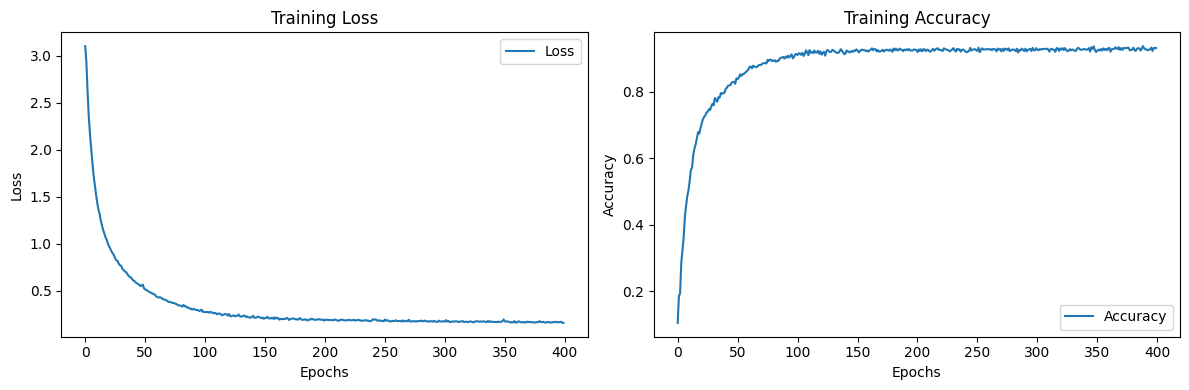

In [162]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

In [163]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                8320      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 23)                207       
                                                                 
Total params: 11271 (44.03 KB)
Trainable params: 11271 (44.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
predictions = model.predict(X_test2)
print(predictions[0]) #outputs 398 probability values of the input feature belonging to that class in contrast to other 397 classes

1/1 [==============================] - 0s 78ms/step
[4.0269424e-07 2.8052179e-14 1.4021886e-21 6.1452188e-10 4.1040502e-29
 1.2301458e-14 2.7078951e-08 7.1405972e-13 1.8498253e-15 8.4484251e-05
 3.8680249e-13 6.2757149e-29 3.5007812e-20 1.3944754e-21 9.9991405e-01
 3.2074148e-28 1.9567199e-09 1.4350303e-13 2.3824012e-07 1.7235647e-07
 2.8104126e-14 2.3646319e-11 6.5316431e-07]


In [165]:
for i,val in enumerate(predictions[0]):  #we will consider the class giving the highest probability as our predicted class
    if val==max(predictions[0]):
        print(f"Class {i}")

Class 14


In [166]:
le1.inverse_transform([np.argmax(predictions[0])])

array(['Salesforce Developer'], dtype=object)

In [167]:
pred = model.predict(X_test)
pred

16/16 [==============================] - 0s 2ms/step


array([[4.0269575e-07, 2.8052124e-14, 1.4021993e-21, ..., 2.8104231e-14,
        2.3646272e-11, 6.5316436e-07],
       [1.2766041e-19, 0.0000000e+00, 2.7338295e-37, ..., 9.9989718e-01,
        4.7597805e-08, 4.9502556e-20],
       [2.5522143e-23, 1.8644606e-08, 1.4327326e-09, ..., 3.8679616e-33,
        1.1429462e-11, 3.9743667e-05],
       ...,
       [1.7306169e-11, 3.3288026e-26, 2.2253713e-22, ..., 1.4346505e-10,
        5.0200972e-12, 8.9568157e-06],
       [1.6555054e-14, 1.5032139e-30, 7.4573465e-35, ..., 9.9781018e-01,
        4.8210259e-06, 1.5301572e-15],
       [4.4454217e-05, 8.2861691e-09, 6.5998648e-08, ..., 1.4298156e-17,
        4.0903282e-03, 2.9338326e-08]], dtype=float32)

In [168]:
pred2 = []
for i in range(len(pred)):
  pred2.append(np.argmax(pred[i]))
pred2

[14,
 20,
 15,
 16,
 3,
 2,
 6,
 17,
 14,
 9,
 9,
 3,
 3,
 4,
 22,
 16,
 10,
 16,
 1,
 8,
 3,
 12,
 8,
 2,
 15,
 14,
 18,
 18,
 8,
 10,
 3,
 1,
 7,
 3,
 21,
 6,
 13,
 16,
 20,
 16,
 4,
 10,
 2,
 16,
 11,
 3,
 10,
 10,
 18,
 2,
 10,
 3,
 16,
 13,
 10,
 19,
 18,
 10,
 14,
 15,
 14,
 13,
 16,
 7,
 3,
 6,
 16,
 10,
 11,
 13,
 21,
 3,
 1,
 2,
 21,
 2,
 10,
 3,
 13,
 2,
 19,
 3,
 1,
 13,
 6,
 2,
 21,
 8,
 4,
 2,
 4,
 10,
 3,
 10,
 17,
 3,
 1,
 20,
 10,
 1,
 16,
 1,
 21,
 12,
 3,
 5,
 10,
 16,
 14,
 8,
 20,
 2,
 3,
 8,
 9,
 10,
 19,
 12,
 15,
 22,
 13,
 11,
 11,
 10,
 1,
 22,
 2,
 3,
 10,
 22,
 8,
 6,
 18,
 12,
 17,
 3,
 13,
 21,
 18,
 12,
 7,
 20,
 14,
 1,
 2,
 14,
 16,
 4,
 6,
 2,
 1,
 3,
 8,
 13,
 2,
 8,
 13,
 1,
 2,
 10,
 6,
 3,
 13,
 1,
 17,
 13,
 16,
 7,
 2,
 2,
 2,
 17,
 1,
 16,
 20,
 3,
 8,
 1,
 5,
 13,
 10,
 5,
 15,
 3,
 8,
 2,
 0,
 3,
 15,
 6,
 1,
 1,
 1,
 10,
 16,
 10,
 21,
 10,
 12,
 21,
 14,
 3,
 2,
 9,
 20,
 11,
 6,
 14,
 16,
 16,
 11,
 14,
 1,
 7,
 3,
 8,
 6,
 9,
 10,
 18,
 12,

In [169]:
y_pred = pred2

ann_acc = accuracy_score(ann_y_test, y_pred)
print("ANN accuracy:", ann_acc)
# ann_acc2 = cross_val_score(model,X_train,ann_y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", ann_acc)
prv = precision_score(ann_y_test,y_pred,average="weighted")
print("Precision:", prv)
f1v = f1_score(ann_y_test,y_pred,average="weighted")
print("F1 Score:", f1v)

names.append('ANN')
scores.append(ann_acc)
cross_scores.append(ann_acc)
pr.append(prv)
f1.append(f1v)

ANN accuracy: 0.7945205479452054
Cross-Validation Accuracy: 0.7945205479452054
Precision: 0.8062157433441277
F1 Score: 0.7919654354367056


# ***LightGBM***

In [170]:
import lightgbm as lgb

#set the training data
train_data = lgb.Dataset(X_train, label=ann_y_train)

# Set parameters for LGBM classifier
params = {'objective': 'multiclass', 'num_classes': len(y_train.unique()), 'random_state': 42, 'learning_rate': 0.1, 'num_iterations': 1000}

#Create and Train an LGBM classifier
lgb_classifier = lgb.train(params, train_data)

# Predict on test set and evaluate accuracy
y_pred_lgb = lgb_classifier.predict(X_test)
y_pred_lgb

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

array([[1.14853507e-07, 2.15599314e-06, 1.18980880e-08, ...,
        1.77035101e-05, 3.35368256e-04, 1.64283840e-05],
       [1.99419895e-07, 6.51567177e-06, 1.51907663e-06, ...,
        9.99827867e-01, 2.27254389e-07, 6.33013752e-08],
       [7.05625197e-06, 5.04708012e-08, 5.85195964e-07, ...,
        1.34885071e-08, 1.18893109e-03, 9.94136200e-01],
       ...,
       [1.03578911e-07, 1.67098812e-07, 1.11842877e-08, ...,
        1.73280789e-05, 3.47808214e-06, 2.73550221e-06],
       [1.91624219e-07, 3.13655304e-07, 8.85620903e-09, ...,
        9.99145796e-01, 5.80420744e-07, 6.21601630e-07],
       [2.01060418e-05, 3.46295953e-05, 6.43090013e-05, ...,
        4.72329972e-06, 5.57344798e-03, 5.59572867e-07]])

In [171]:
# y_pred_lgb_bin = [1 if x > 0.5 else 0 for x in y_pred_lgb]
pred2 = []
for i in range(len(y_pred_lgb)):
  pred2.append(np.argmax(y_pred_lgb[i]))
y_pred_lgb_bin = pred2

In [172]:
accuracy_lgb = accuracy_score(ann_y_test, y_pred_lgb_bin)
print("Accuracy of LGBM Classifier:",accuracy_lgb)
# accuracy_lgb2 = cross_val_score(lgb_classifier,X_train,ann_y_train,scoring="accuracy")
print("Cross-Validation Accuracy:", accuracy_lgb)
prv = precision_score(ann_y_test,y_pred_lgb_bin,average="weighted")
print("Precision:", prv)
f1v = f1_score(ann_y_test,y_pred_lgb_bin,average="weighted")
print("F1 Score:", f1v)

names.append('LGB')
scores.append(accuracy_lgb)
cross_scores.append(accuracy_lgb)
pr.append(prv)
f1.append(f1v)

Accuracy of LGBM Classifier: 0.8082191780821918
Cross-Validation Accuracy: 0.8082191780821918
Precision: 0.8206270540312519
F1 Score: 0.8075750378466181


# ***Comparing model performances***

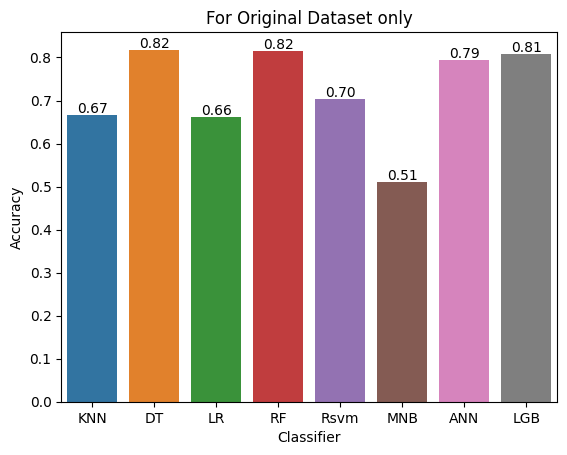

In [173]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': scores}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

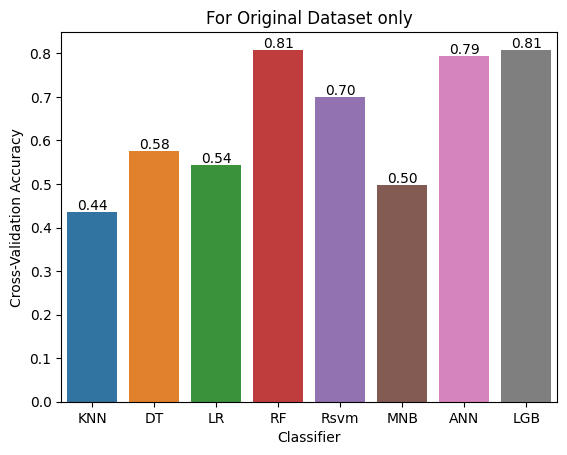

In [174]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': cross_scores}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Cross-Validation Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

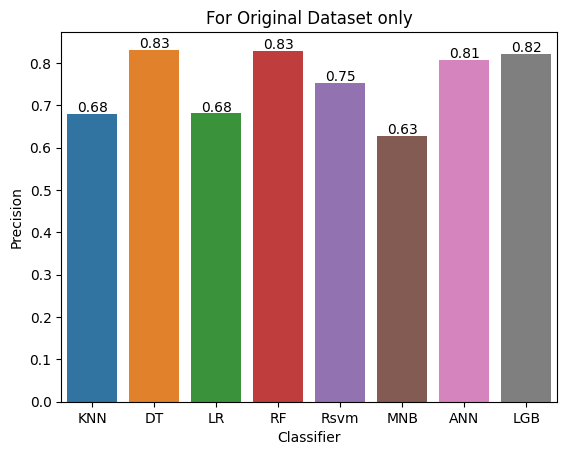

In [175]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': pr}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='Precision')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

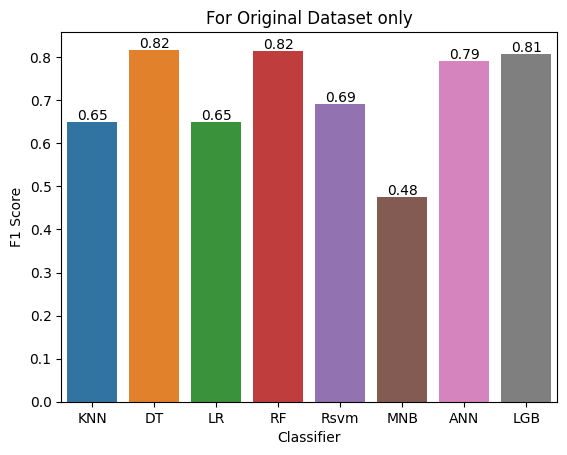

In [176]:
axis = sns.barplot(x = 'Name', y = 'Score', data = pd.DataFrame({'Name': names, 'Score': f1}) )
axis.set(title='For Original Dataset only',xlabel='Classifier', ylabel='F1 Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}'.format(height), ha="center")

# ***Downloading PKL Files***

In [177]:
# with open('le.pkl', 'wb') as file:
#     pickle.dump(le, file)
# files.download("le.pkl")

In [178]:
# with open('ML_model.pkl', 'wb') as file:
#     pickle.dump(rmf_clf, file)
# files.download("ML_model.pkl")

In [179]:
# If ANN is chosen
# with open('le1.pkl', 'wb') as file:
#     pickle.dump(le1, file)
# files.download("le1.pkl")

# ***PLAY SOUND ONCE ALL THE CODES ARE EXECUTED***

In [180]:
from IPython.display import HTML
# Display the HTML element
display(HTML(f"""<audio controls autoplay loop><source src='http://codeskulptor-demos.commondatastorage.googleapis.com/descent/gotitem.mp3' type="audio/mpeg"></audio>"""))